In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

train = pd.read_csv("train.csv")
train.drop("PassengerId", axis = 1, inplace = True)
test = pd.read_csv("test.csv")
test.drop("PassengerId", axis = 1, inplace = True)
# drop PassengerId as it's useless for the use of data analysis

In [2]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.shape

(891, 11)

In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#get an understanding as to what values are missing and what to do with them
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


We have missing values for Age, Cabin, and Embarked.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12274bca0>,
      dtype=object)

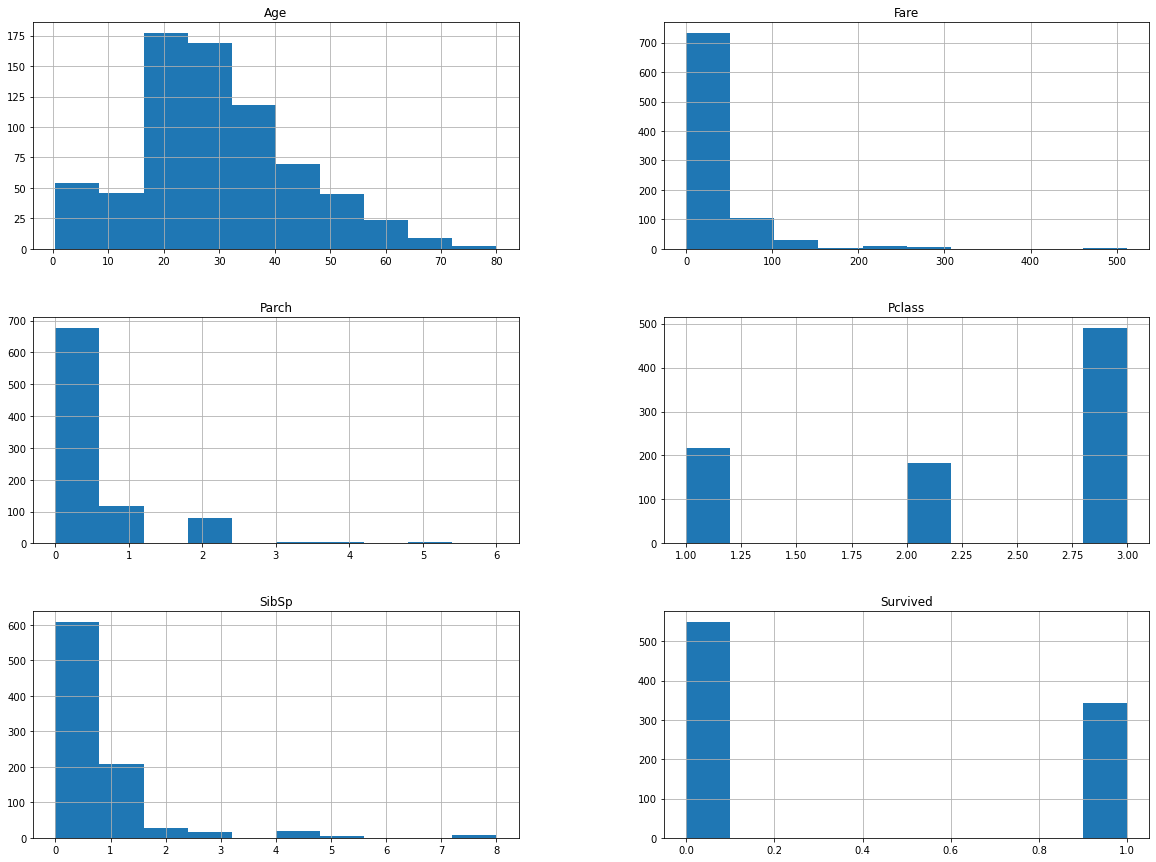

In [6]:
train.hist(bins=10, figsize = (20,15))

Inisights gained:

Age: It looks as though a lot of people where in their 20s and 30s on the titanic

Fare: A lot of the tickets seemed to be on the lower end and were filled with people from the 3rd class (this is my assumption)

Parch: A lot of the people since they were in there 20s and 30s were not with their parents so thus this could be the explanation as to why there are so many samples of 0 for parch

Pclass: Just as expected, this is positively correlated with the fare and thus we have a lot more 3rd class passengers than 1st or 2nd class.

SibSp: This data shows how many siblings where on the titanic per passenger. It's hard to say if you were with more siblings whether your chances of survival improved or not.

Survived: A lot of people did not survive the tragedy, but this data doesn't seem to give any insights as it's our labeled data.

### Lesson learned, don't bother changing any of the data values or processing them until afer you've done data analysis and see what the data is telling you. Otherwise you're going to be left confused and wondering what each data variable even means. Data scrubbing should be the last thing done before building the model as that will allow you to understand what is going on.

Let's begin altering the data by replacing the sex of each person with binary values

In [7]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Let's take a look at the data and see weather gender has any effect on survival

In [8]:
train[['Survived','Sex']].groupby(['Sex']).mean().sort_values(by = 'Survived', ascending = True)

,Survived
Sex,
male,0.188908
female,0.742038


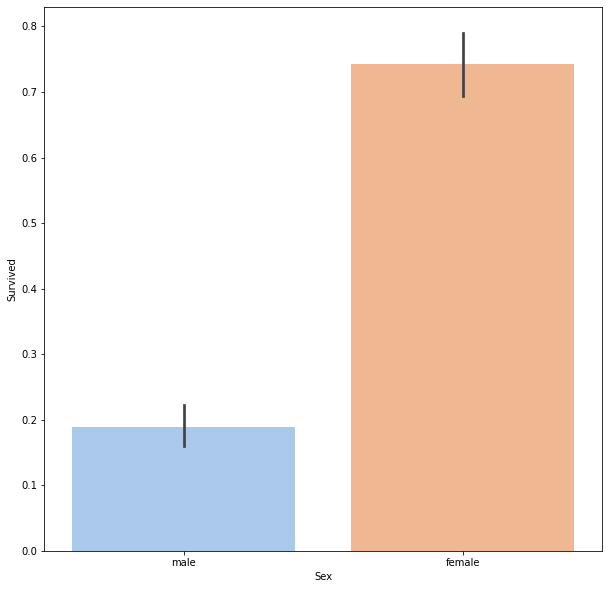

In [9]:
plt.figure(figsize = (10,10))
sns.barplot(data = train[['Survived', 'Sex']], x = 'Sex', y = 'Survived', palette = sns.color_palette("pastel"))
# because I love pastel colors

So right off the bat the data is showing that women had a higher survival rate of around 74% versus men who had a 18.8% chance of survival. I expect our model to predict more favorablely towards women for survival than men. Now let's explore the relation between class and survial rates.

In [10]:
train.Pclass.value_counts(ascending = True)

2    184
1    216
3    491
Name: Pclass, dtype: int64

In [11]:
train.groupby(['Pclass']).mean().sort_values(by = 'Survived', ascending = False)

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


Here the data is showing us that 1st class had the highest chances of survival, followed by 2nd, and then finally 3rd. Now let's combine Sex and Pclass to maybe get a better understanding of how class and gender play a role in survival.

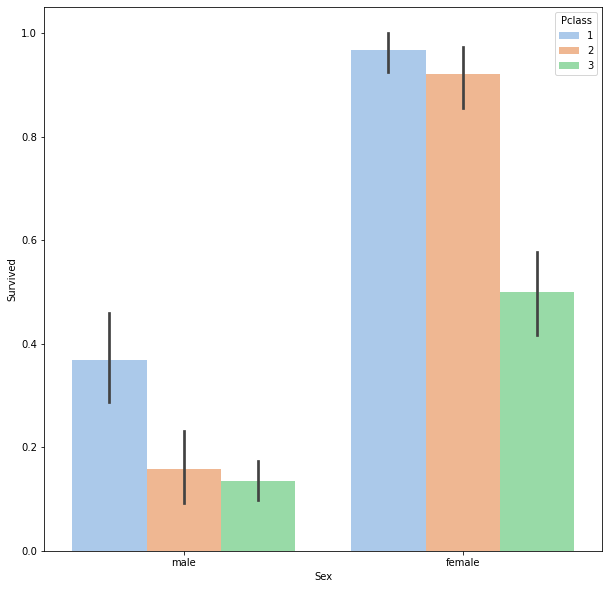

In [12]:
plt.figure(figsize = (10,10))
sns.barplot(data = train, x = 'Sex', y = 'Survived', hue = 'Pclass', palette = sns.color_palette("pastel"))

So it's evident to see that women who were in first class had the highest chance of survival, followed by second, then third. The same pattern followed for men as well.

In [13]:
# I want to take a look at fare, pclass, and the survival rate
fare_class = train[['Survived','Pclass','Fare']]
fare_class.corr()

,Survived,Pclass,Fare
Survived,1.000000,-0.338481,0.257307
Pclass,-0.338481,1.000000,-0.549500
Fare,0.257307,-0.549500,1.000000


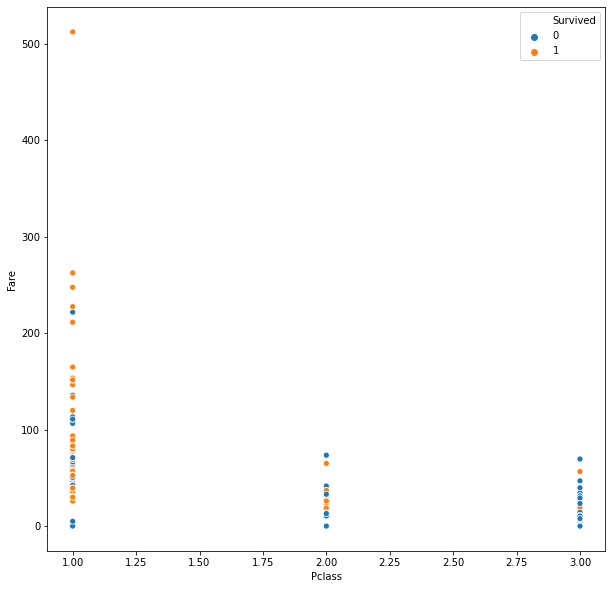

In [14]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = fare_class, x = 'Pclass', y = 'Fare', hue = 'Survived')

There seems to be a positive correlation between survival and having a higher fare

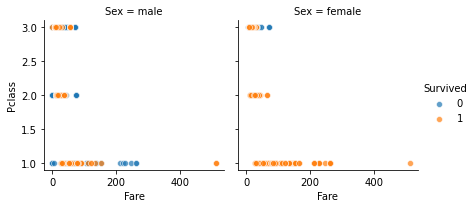

In [15]:
MvF = sns.FacetGrid(train, col="Sex", hue="Survived")
MvF.map(sns.scatterplot, "Fare", "Pclass", alpha=.7)
MvF.add_legend()

Just as we have seen before, women have a higher chance of survival, especially the higher their status is. Men on the other hand surprisingly have a higher chance of survival the lower their fare is. However as seen before, 1st class had the highest survival rates.

In [16]:
# instead of touching the training dataset, I've created a new one copying the old to see more from the data
train_mod = train
train_mod = train_mod.replace(['male','female'], [0,1])
corr_matrix = train_mod.corr('pearson')
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

### Insights:
After looking at the data, it seems that every single data point we have so far is necessary for prediction and it would be wise to get rid of columns such as cabin since there is a lot of missing data for it and it could be too much work to try to keep it. 

In [17]:
train_mod[['Survived','Ticket']].sample(n = 20)

,Survived,Ticket
715,0,348124
82,1,330932
427,1,250655
180,0,CA. 2343
536,0,113050
395,0,350052
121,0,A4. 54510
174,0,17764
527,0,PC 17483
711,0,113028


### Insights and Assumptions:
Ok so my intuition was this when looking at the ticket class. The tickets are all numbers but some of them have strings attached prior to the numbers. Now realistically these tickets are references to where the people bored the ship and it can be reasonably assumed that where you boarded the ship is also where you were to stay in the ship, i.e. the cabin. Given this assumption we can now assume that the ticket can be a good substitute for cabin because if we think about it, the location of your cabin could very well impact your chances of survival. Because let's say your cabin was where the boat hit the iceberg, chances are high that the person would've died. Now on the other hand if a cabin was on the upper levels and far from the iceberg, chances are high that the person if they were a woman and in their 30s would have survived. This is all under the assumption that a passengers ticket is linked to cabin.

So given this information, what I think would be smart to do is to alter the tickets column to get rid of the strings and convert the data to an int64 and then see the correlation or effect it has on Survival.

In [18]:
# Now lets check if where we embarked had any effect on survival
train_mod[['Survived','Embarked']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


As we can see, those who embarked at the C port had the highest chances of survival with almost equivalent survival rates for Q and S. What we can do with this data now is look at the missing cells in the Embarked column and from there we can mark them as C if they survived and S if they didn't. I believe this to be a fairly reasonable assumption as I'm basing it off of what the data is telling me.

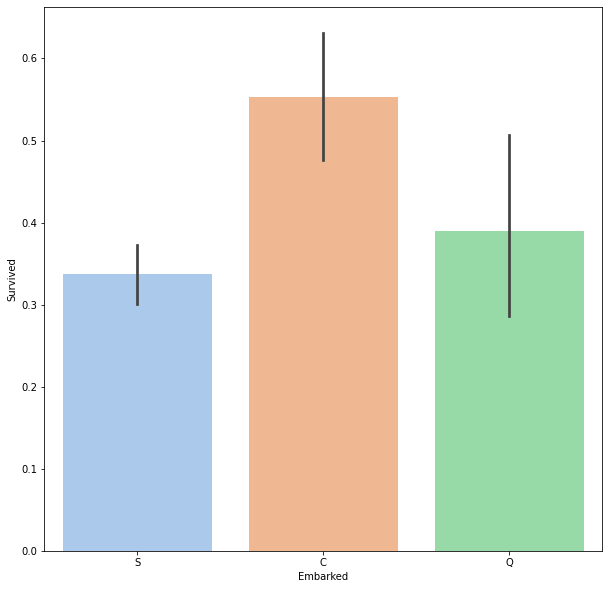

In [19]:
plt.figure(figsize = (10,10))
sns.barplot(data = train_mod, x = 'Embarked', y = 'Survived', palette = sns.color_palette("pastel"))

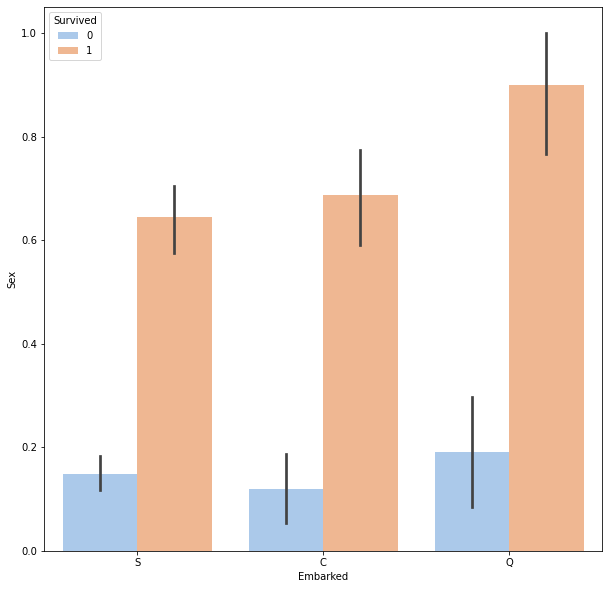

In [20]:
# lets see if sex and embarked have any correlation
plt.figure(figsize = (10,10))
sns.barplot(data = train_mod, x = 'Embarked', y = 'Sex', palette = sns.color_palette("pastel"), hue = 'Survived')

Now this is interesting! I thought that we could base our previous fillna assumption on survival alone but it seems gender does play a role in this aswell! Both men and women who boarded on port Q had a higher chance of surival then any other port! Let's take a look at the data showing us concrete numbers.

In [21]:
train_mod[['Survived','Embarked','Sex', 'Pclass']].groupby('Embarked').mean()

,Survived,Sex,Pclass
Embarked,,,
C,0.553571,0.434524,1.886905
Q,0.389610,0.467532,2.909091
S,0.336957,0.315217,2.350932


So this is interesting, I've added Pclass because I whad a hunch that more people from first class must have gotten on C since we saw overall C had the highest surival rate, but upon further exploration, C did in fact have the most first class passengers as we can see the mean is skewed toward the lesser end of 2, while Q was filled with more 3rd class passengers. And interestingly enough, since 3rd class had the highest population of passengers and Q also has the most amount of women as well, it makes sense to explain how Q has the most female survivers. So with this information now, if there are any null values in Embarked, if they are a woman and survived it'd be pretty reasonable to place them as their embarked area as Q, unless they are first class in which case it'd make more sense to mark them as C. This is also ofc ignoring the possibility that S has both the most amount of first and third class passengers since we can see they have an average of 2.35, but for the time being this is a risk I'm willing to take and wish to see how this all plays out.

# Begin Processing the Data and Scrubbing It

In [22]:
# Some quick code to get rid of the strings in front of the Ticket cells and to just keep the numbers
y = train_mod.Ticket.size
for inc in range(0,y):
    train_mod.Ticket.loc[inc]
    for element, char in enumerate(train_mod.Ticket.loc[inc]):
        modStr = train_mod.Ticket.loc[inc]
        if char == " ":
            index = element + 1
            train_mod.Ticket.loc[inc] = modStr[index:]
    if train_mod.Ticket.loc[inc] == "LINE":
            train_mod.Ticket.loc[inc] = 0

/Users/Aaron/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
# now need to convert from object to int64
# but first we have to fix this one issue because LINE located in Ticket column, row 179 can't be converted to int
train_mod['Ticket'] = pd.to_numeric(train_mod['Ticket'])

In [24]:
corr_matrix = train_mod.corr('pearson')
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Ticket     -0.115174
Pclass     -0.338481
Name: Survived, dtype: float64

Ok so now we see that tickets have a slight negative correlation with survival, where the larger the ticket value, the lower the chances of survival seem to be. This of course under the assumption that ticket value corresponds with cabin which relates to geography of the ship and also affects chances of survival.

Now on to the final piece of data that I think could be of use exploring. The name of the passengers. What I specifically want to use is the prefix of each person, as the prefix can most likely be used as a means of prediction. For example, did women who are married have a higher chance of survival?

In [25]:
# Implement a for loop to extract the prefixes from all of the data points
sampleCol = train_mod.Name.str.split(',')
for i in range (0,sampleCol.size):
    sampleCol[i] = sampleCol.loc[i][1].split('.')
    sampleCol[i] = sampleCol.loc[i][0].strip()
sampleCol.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Lady              1
the Countess      1
Sir               1
Jonkheer          1
Capt              1
Ms                1
Don               1
Name: Name, dtype: int64

Ok so now I have successfully gotten the titles of all of the passengers. Even though there are some strange titles such as Jonkheer and the countess (apparently royalty was on the ship) I will keep them. However I want to fix some of them such as Ms as that could be made Miss and we can change Mme to a Mrs since Mme stands for madam. I'm going to assume that it's for a married woman.

In [26]:
for i in range (0,sampleCol.size):
    if sampleCol[i] == 'Ms':
        sampleCol[i] = 'Miss'
    elif sampleCol[i] == "Mme":
        sampleCol[i] = "Mrs"
        
sampleCol.value_counts()

Mr              517
Miss            183
Mrs             126
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Sir               1
Capt              1
Jonkheer          1
the Countess      1
Lady              1
Don               1
Name: Name, dtype: int64

Here we have successfully incremented the total ammount of Miss and Mrs. We'll keep the outlier titles because they might be of some use for the test set. Now what we'll do next is we'll input this table into our train_mod, but before that, we're going to modify the sampleCol one final time by using the label encoder so that we can convert the values to understandable data for our algorithm.

In [27]:
from sklearn.preprocessing import LabelEncoder
# import the label encoder to create labels for the name column
label_encoder = LabelEncoder()
sampleCol = label_encoder.fit_transform(sampleCol)
train_mod["Name"] = sampleCol
#train mod should now have all of the labels in its Name column
train_mod.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,10,0,22.0,1,0,21171.0,7.2500,NaN,S
1,1,1,11,1,38.0,1,0,17599.0,71.2833,C85,C
2,1,3,8,1,26.0,0,0,3101282.0,7.9250,NaN,S
3,1,1,11,1,35.0,1,0,113803.0,53.1000,C123,S
4,0,3,10,0,35.0,0,0,373450.0,8.0500,NaN,S


In [28]:
# now time to drop the cabin column as it's pretty redundent and useless
train_mod.drop(["Cabin"], axis=1, inplace = True)
train_mod.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,10,0,22.0,1,0,21171.0,7.2500,S
1,1,1,11,1,38.0,1,0,17599.0,71.2833,C
2,1,3,8,1,26.0,0,0,3101282.0,7.9250,S
3,1,1,11,1,35.0,1,0,113803.0,53.1000,S
4,0,3,10,0,35.0,0,0,373450.0,8.0500,S


We've got one final thing to do before we move onto selecting a model for our data! We still have a bunch of null values in our Age column, and I think a decent way to go about this is by filling those values with the median age. I think it's a safe bet since the data shows that most people on board where between 20-40.

In [29]:
# replace missing values from Age column with median
train_mod.Age.fillna(train_mod.Age.median(), inplace = True)

In [30]:
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    878 non-null    float64
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


[Text(0.5, 1.0, 'Correlation Matrix')]

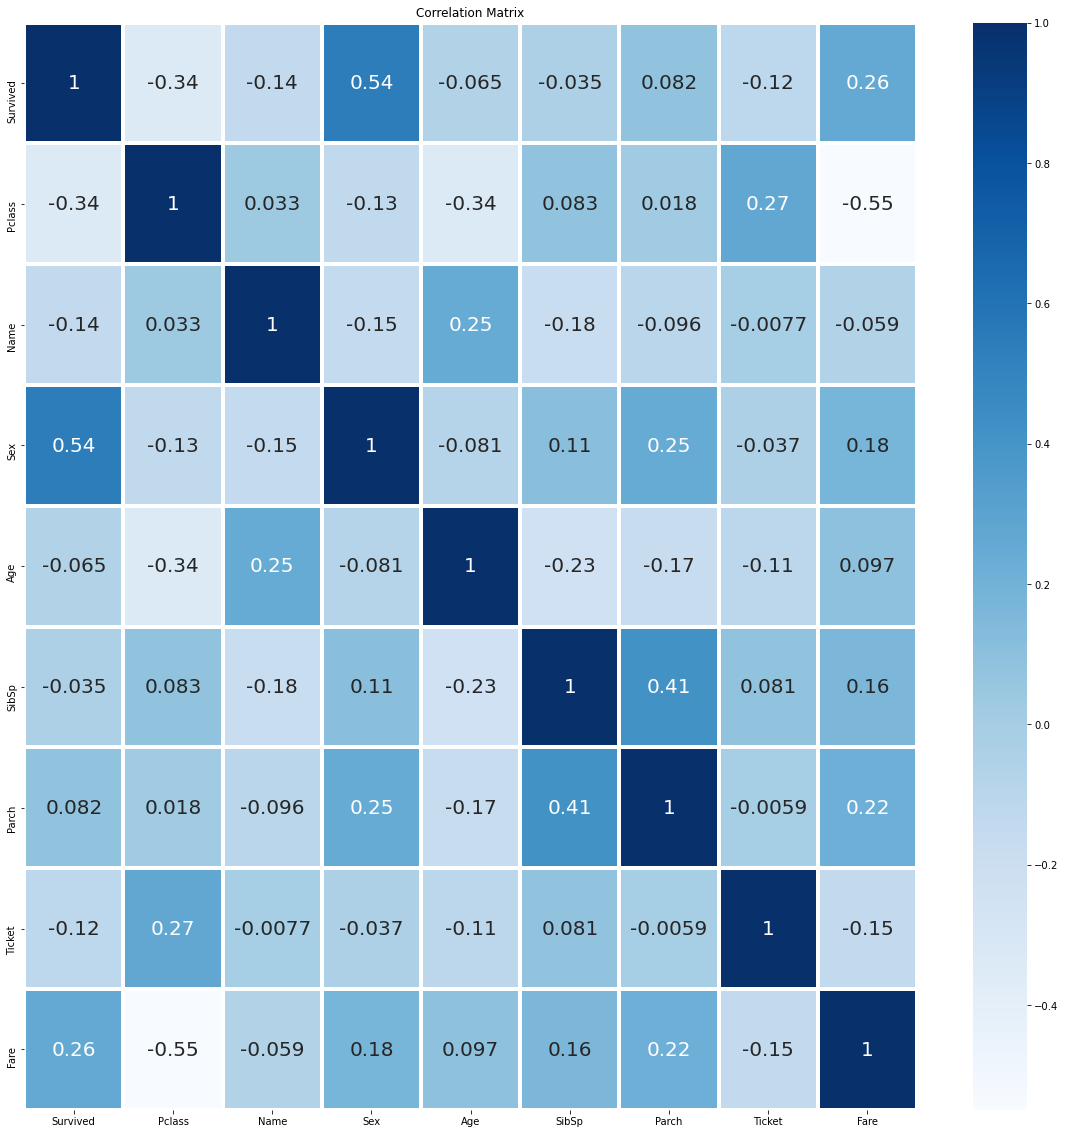

In [31]:
# now to see the new values in our corr_matrix
plt.figure(figsize = (20,20))
annot_kws={'fontsize':20}
ax = sns.heatmap(train_mod.corr(), cmap = 'Blues', annot = True, annot_kws = annot_kws, linewidths = 3, fmt =".2g")
ax.set(title="Correlation Matrix",)

Success! We've now finally finished scrubbing our data in our train mod set! So now that we know how we're going to go about working with our data. It's time to transform both our training data set and our test set.

In [32]:
def ticket_cleaner(data):
    y = data.Ticket.size
    for inc in range(0,y):
        data.Ticket.loc[inc]
        for element, char in enumerate(data.Ticket.loc[inc]):
            modStr = data.Ticket.loc[inc]
            if char == " ":
                index = element + 1
                data.Ticket.loc[inc] = modStr[index:]
        if data.Ticket.loc[inc] == "LINE":
                data.Ticket.loc[inc] = 0
    return data

def name_cleaner(data):
    for i in range (0,data.Name.size):
        data.Name.loc[i] = data.Name.loc[i][1].split('.')
        data.Name.loc[i] = data.Name.loc[i][0].strip()
    for i in range (0,data.Name.size):
        if data.Name.loc[i] == 'Ms':
            data.Name.loc[i] = 'Miss'
        elif data.Name.loc[i] == "Mme":
            data.Name.loc[i] = "Mrs"
    data.Name = label_encoder.fit_transform(data.Name)
    return data

def final_scrub(data):
    data.Embarked.replace(['S','C', 'Q'], [0,1,2], inplace = True)
    data.replace(['male','female'], [0,1], inplace = True)
    data.Age.fillna(train_mod.Age.median(), inplace = True)
    data.drop('Cabin',axis = 1, inplace = True)
    return data

#ticket_cleaner(train) something is wrong with the ticket cleaner and I need to investigate
ticket_cleaner(test)
name_cleaner(train)
name_cleaner(test)
ticket_cleaner(test)
final_scrub(train)
final_scrub(test)

/Users/Aaron/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,4,0,34.5,0,0,330911,7.8292,2
1,3,6,1,47.0,1,0,363272,7.0000,0
2,2,21,0,62.0,0,0,240276,9.6875,2
3,3,6,0,27.0,0,0,315154,8.6625,0
4,3,6,1,22.0,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...
413,3,13,0,28.0,0,0,3236,8.0500,0
414,1,9,1,39.0,0,0,17758,108.9000,1
415,3,1,0,38.5,0,0,3101262,7.2500,0
416,3,1,0,28.0,0,0,359309,8.0500,0


In [33]:
train.sample(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
837,0,3,7,0,28.0,0,0,392092,8.0500,0.0
642,0,3,9,1,2.0,3,2,347088,27.9000,0.0
697,1,3,18,1,28.0,0,0,35852,7.7333,2.0
57,0,3,13,0,28.5,0,0,2697,7.2292,1.0
398,0,2,1,0,23.0,0,0,244278,10.5000,0.0
4,0,3,10,0,35.0,0,0,373450,8.0500,0.0
374,0,3,1,1,3.0,3,1,349909,21.0750,0.0
266,0,3,1,0,16.0,4,1,3101295,39.6875,0.0
447,1,1,5,0,34.0,0,0,113794,26.5500,0.0
884,0,3,18,0,25.0,0,0,SOTON/OQ 392076,7.0500,0.0


Alright! We've succesfully implemented our functions for scrubbing and cleaning the data, however later on I would like to implement a pipeline to get things done much more efficiently. The next step now is to normalize our data and to choose a model for classification!

In [34]:
# fill in any null variables for embarked by finding the syntaxes, 
# observing their features to accurately label them
for i in range(0,train.Embarked.size):
    if pd.isnull(train.Embarked.loc[i]):
        train.Embarked.loc[i] = 1
# both are first class, female, and survived, so I marked them as 1 to represent that they embarked at port C

/Users/Aaron/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
# honestly trying to work the ticket column into the data is too much work for a slight increase in accuracy so I've 
# made the executive decision to just drop it from both data sets
train.drop('Ticket',axis = 1, inplace = True)
test.drop('Ticket',axis = 1, inplace = True)

In [36]:
# Normalize the data so that the algorithms can actually understand what is going on
train_norm = sklearn.preprocessing.normalize(train)

In [37]:
# We don't have a y_test since the test data did not have a Survived Label
from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis = 1)
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split the training set in order for us to do CV checking and to also optimize our model for later use

In [38]:
#import all of the standard classifiers and fit the training data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

LogReg = LogisticRegression(max_iter=1000, random_state = 42)
# set max_iter to 1000 for logistic regression
tree = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
SGD = SGDClassifier()
clf_svc = SVC(gamma='auto')
forest = RandomForestClassifier()

LogReg.fit(X_train, y_train)
tree.fit(X_train, y_train)
SGD.fit(X_train, y_train)
clf_svc.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Now let's import the accuracy score module so that we can see how accurate our models are
from sklearn.metrics import accuracy_score

LogReg_pred = LogReg.predict(X_train)
tree_pred = tree.predict(X_train)
SGD_pred = SGD.predict(X_train)
svc_pred = clf_svc.predict(X_train)
forest_pred = forest.predict(X_train)

predictions = [LogReg_pred, tree_pred, SGD_pred, svc_pred, forest_pred]
accuracy = []
for i in range(0,5):
    score = accuracy_score(y_train, predictions[i])
    accuracy.append(score)
    
print('Logistic Regression: ', accuracy[0])
print('Decision Tree: ', accuracy[1])
print('SGD Classifier: ', accuracy[2])
print('Support Vector Classifier: ', accuracy[3])
print('Random Forest Classifier: ', accuracy[4])

Logistic Regression:  0.8047752808988764
Decision Tree:  0.9887640449438202
SGD Classifier:  0.7008426966292135
Support Vector Classifier:  0.9157303370786517
Random Forest Classifier:  0.9887640449438202


In [40]:
# check to see how accurate/good the decision tree classifier really is
from sklearn.model_selection import cross_val_score
cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy").mean()
# when using the cross_val_score method we can see that our tree classifier isn't as good as we thought it was

0.7275288092189501

In [41]:
# let's now check out what our second highest classifier scores, maybe it will do better?
cross_val_score(forest, X_train, y_train, cv=5,scoring='accuracy').mean()

0.8132079188417215

This is way better than the decision tree classifier!

# Taking a look at the performance of the Random Forest Classifier we built

In [42]:
# we use the cross_val_predict method in order to get 3 different scores of predictions
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest, X_train, y_train, cv=3)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred, normalize='true')
cm

array([[0.89189189, 0.10810811],
       [0.32089552, 0.67910448]])

<function matplotlib.pyplot.show(*args, **kw)>

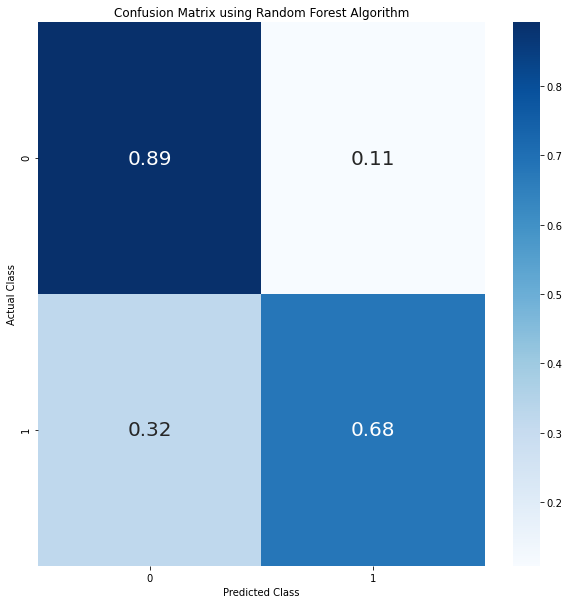

In [44]:
plt.figure(figsize=(10,10))
annot_kws={'fontsize':20}
sns.heatmap(cm, cmap = 'Blues',annot=True, annot_kws = annot_kws)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix using Random Forest Algorithm')
plt.show

So 90% of the those that did not survive are accurately getting labeled, versus 11% are false positives. And we have 33% of survivors being labeled as false negatives or as not surviving.

In [45]:
from sklearn.metrics import precision_score, recall_score
p_score = precision_score(y_train, y_train_pred)
r_score = recall_score(y_train, y_train_pred)
print('p_score: ',p_score)
print('r_score: ',r_score)

p_score:  0.7913043478260869
r_score:  0.6791044776119403


In [46]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.7309236947791165

In [47]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(tree, X_train, y_train, cv=5,)
fpr, tpr, thresholds = roc_curve(y_true = y_train, y_score = y_scores)

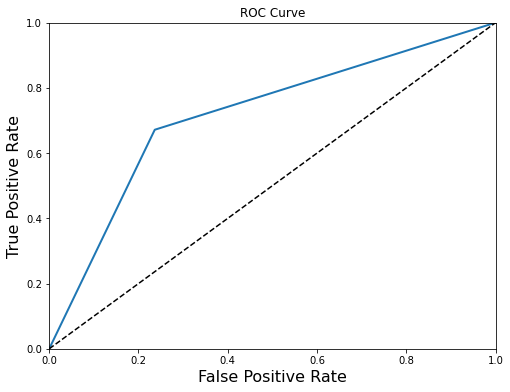

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title("ROC Curve")

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

## Time to create a pipeline to process the test data set to make life easier.

In [49]:
from sklearn import pipeline
num_pipeline = 